In [22]:
from PIL import Image
import numpy as np
import cv2

(500, 500)


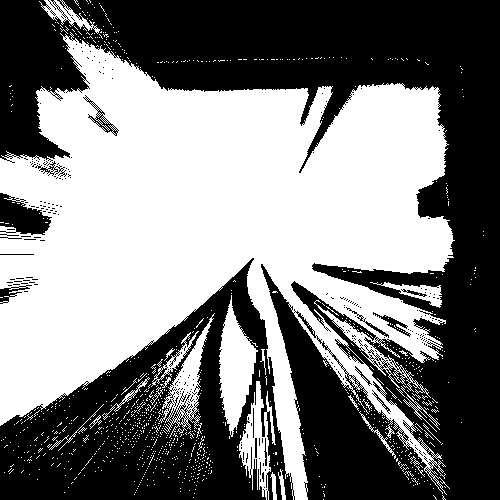

In [67]:
img = Image.open("my.png")
img_arr=np.array(img.copy())


print(img_arr.shape)
img_arr[img_arr<=254]=0
img2=Image.fromarray(img_arr)
img2

In [68]:
def consecutive_points(arr):
    #print('arr:',arr)
    c_points = np.where(arr==255)[0]
    if(len(c_points)==0):
        c_points = [0]
    #print('c_points:',c_points)
    temp = c_points[0]-1
    new_point = []
    #print(c_points)
    arr_c = []
    for val in c_points:
        #print(val)
        
        if val==temp+1:
            arr_c.append(val)
        else:
            if(len(arr_c)>0):
                yield (int(np.mean(arr_c)),len(arr_c))
                #new_point.append((int(np.mean(arr_c)),len(arr_c)))
            arr_c = []
        temp = val
    #return new_point
def all_data_yeild(img_arr):
    i=0
    while i<len(img_arr):
        a1 = consecutive_points(img_arr[i])
        ap = []
        for val in a1:
            ap.append(val)
        yield ap
        i+=1

#img_arr = img_arr.T
def detect_doors(img_arr):
    all_d = all_data_yeild(img_arr)
    all_val = []
    j = 0
    for val in all_d:
        val2 = map(lambda x:x[1],val)

        if(len(val2)>0):
            all_val.append((val[np.argmax(val2)][0],val[np.argmax(val2)][1],j))
        else:
            all_val.append(( 0,0,j))
        j+=1
    
    
    #print(all_val)
    dist_limit = 70
    all_indexes = np.where(np.array(np.array(map(lambda x:x[1],all_val)))>dist_limit)[0]
    index1 = all_indexes[0]
    index2 = all_indexes[-5]
    #print(index1)
    #print(index2)
    img_arr[all_val[index1][2]][all_val[index1][0]-int(all_val[index1][1]/2):all_val[index1][0]+int(all_val[index1][1]/2) ] = 155
    img_arr[all_val[index2][2]][all_val[index2][0]-int(all_val[index2][1]/2):all_val[index2][0]+int(all_val[index2][1]/2) ] = 155

    index3=index1
    index4=index2




    img_arr = img_arr.T
    all_d = all_data_yeild(img_arr)
    all_val = []
    j = 0
    #print(all_d)
    for val in all_d:
        val2 = map(lambda x:x[1],val)

        if(len(val2)>0):
            all_val.append((val[np.argmax(val2)][0],val[np.argmax(val2)][1],j))
        else:
            all_val.append(( 0,0,j))
        j+=1

    #print(all_val)
    dist_limit = 100
    all_indexes = np.where(np.array(np.array(map(lambda x:x[1],all_val)))>dist_limit)[0]
    index1 = all_indexes[0]
    index2 = all_indexes[-5]
    #print(index1)
    #print(index2)
    img_arr[all_val[index1][2]][all_val[index1][0]-int(all_val[index1][1]/2):all_val[index1][0]+int(all_val[index1][1]/2) ] = 155
    img_arr[all_val[index2][2]][all_val[index2][0]-int(all_val[index2][1]/2):all_val[index2][0]+int(all_val[index2][1]/2) ] = 155

    img_arr = img_arr.T
    rgb = cv2.cvtColor(img_arr,cv2.COLOR_GRAY2RGB)
    img_rgb=Image.fromarray(rgb)
    rowcol = np.where(rgb[:,:,1]==155)
    rgb[rowcol] = [255,0,0]
    img2=Image.fromarray(rgb)
    return img2,img_arr

In [69]:
print('image shape:',img_arr.shape)
img_draw,img_arr = detect_doors(img_arr)

('image shape:', (500, 500))


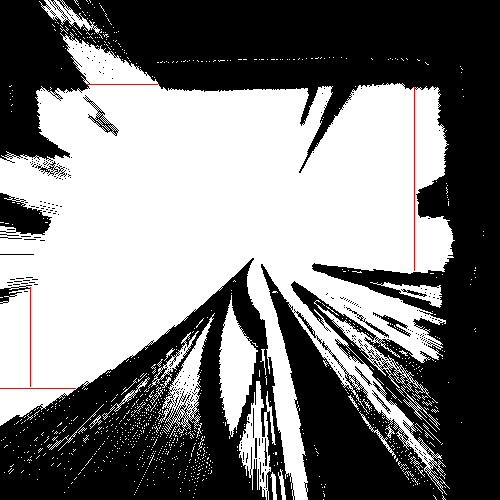

In [70]:
img_draw

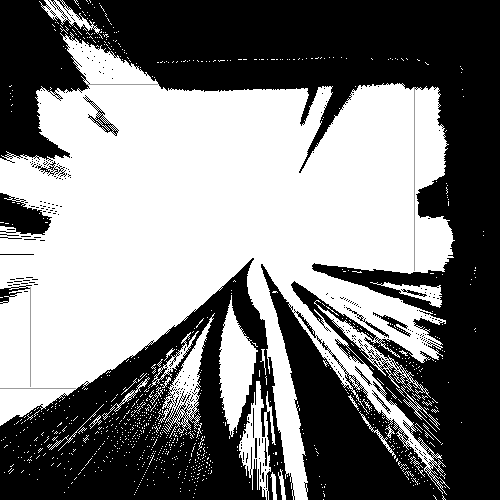

In [40]:
print(index1)
print(index2)
print(index3)
print(index4)

30
414
84
388


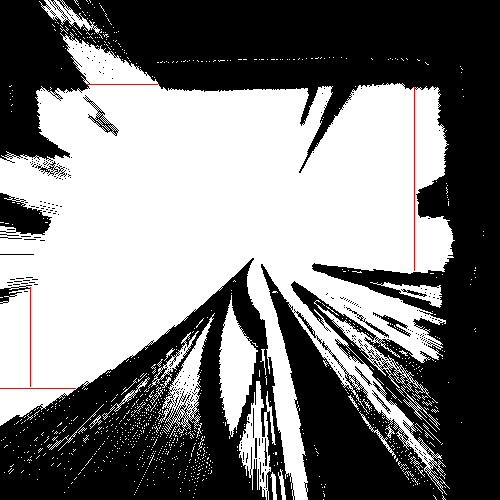

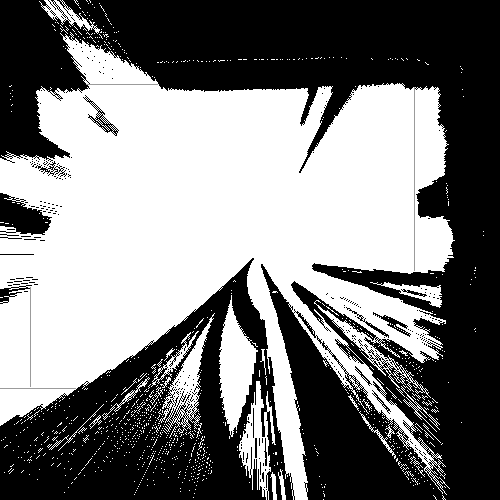

In [11]:
img2=Image.fromarray(img_arr.T)
img2


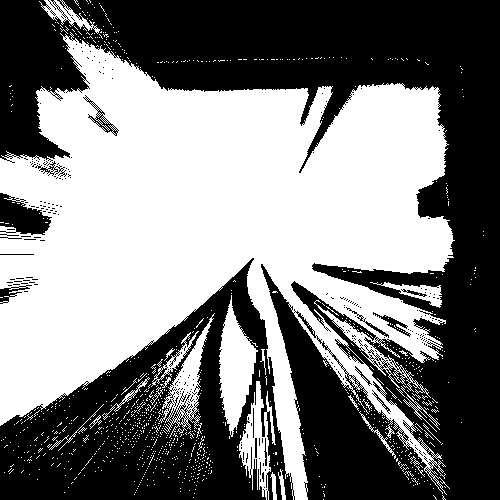

In [89]:
img2

In [1]:
import cv2
import numpy as np

filename = 'my.png'
img = cv2.imread(filename,0)

img

array([[127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       ...,
       [241, 248, 247, ..., 127, 127, 127],
       [248, 248, 252, ..., 127, 127, 127],
       [246, 253, 221, ..., 127, 127, 127]], dtype=uint8)

In [2]:
img[img<=254]=0



gray = img
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=127

dst = np.uint8(dst)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
for i in range(1, len(corners)):
    print(corners[i])
print('9999')
#cv2.imshow('dst',img)
#if cv2.waitKey(0) & 0xff == 27:
#    cv2.destroyAllWindows()

9999


In [ ]:
print(points)

In [75]:
np.diff(img_arr[0])

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 255,   0,   0,   0,   1, 255,   0,   1,   0,
         0, 255,   0,   0,   1,   0,   0, 255,   1, 255,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 255,   1, 255,   1,   0,
         0,   0,   0,   0,   0,   0,   0, 255,   1,   0, 255,   1,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [72]:
img_arr[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 255, 255, 255, 255,   0, 255, 255,   0,
         0,   0, 255, 255, 255,   0,   0,   0, 255,   0, 255,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0, 255,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0, 255,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [50]:
def print_arr(img_arr):
    print('shape:',img_arr.shape)
    i=0
    while i<img_arr.shape[0]:
        j = 0
        while j<img_arr.shape[1]:
            print(img_arr[i][j]),
            j+=1
        print
        i+=1
print_arr(img_arr)

('shape:', (500, 500))
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 186 135 146 190 255 183 159 154 243 156 209 196 184 254 210 213 247 213 253 255 255 255 255 254 255 255 254 254 253 255 255 255 253 254 249 255 235 255 217 242 222 247 218 247 160 198 247 195 250 255 251 255 237 238 242 248 241 251 242 248 247 255 251 254 255 253 218 254 230 251 233 241 254 185 229 193 221 200 200 182 188 255 165 134 180 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 2

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 174 255 255 163 187 255 191 255 175 205 255 194 232 245 255 252 250 251 255 253 255 255 255 255 254 255 255 254 255 253 255 255 255 255 254 253 255 250 255 236 254 181 248 156 243 186 219 238 217 247 255 249 251 224 252 236 209 251 253 243 230 254 235 254 245 251 214 252 234 249 234 245 255 182 182 146 215 179 161 147 167 255 186 130 157 166 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 173 175 255 162 255 151 176 177 255 188 255 145 239 255 165 255 255 255 255 255 255 253 255 255 255 255 255 255 255 254 255 253 255 255 255 255 254 255 255 255 255 255 255 252 255 245 229 242 240 244 242 236 248 146 224 228 254 236 191 249 234 244 253 252 218 253 254 252 250 242 249 240 252 255 183 148 255 216 186 132 138 139 255 183 149 129 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 169 255 150 144 201 180 204 217 137 255 182 255 194 255 154 255 255 255 255 255 255 236 255 255 255 255 254 255 255 254 255 253 255 255 255 255 255 255 255 255 255 255 222 255 193 252 255 254 250 148 248 252 255 243 211 245 227 194 240 234 239 233 252 201 248 253 148 251 252 252 243 255 252 193 175 159 226 212 174 186 145 142 194 173 255 162 145 145 255 141 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 152 208 134 182 179 156 205 158 198 159 164 183 234 143 209 177 149 186 157 230 249 241 254 212 251 251 255 255 236 255 216 252 235 244 255 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 253 216 255 255 252 249 210 246 244 211 244 255 252 144 245 151 248 135 254 254 240 255 247 198 222 212 234 230 221 221 130 178 181 209 129 205 255 182 255 185 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 147 255 255 152 172 166 255 149 204 255 255 162 255 255 255 255 188 203 135 205 212 255 229 248 243 255 255 159 251 246 255 251 255 251 255 244 166 246 250 255 150 253 216 167 255 236 254 246 253 235 255 255 255 255 255 255 255 237 255 230 255 254 239 244 254 163 245 214 253 255 244 183 249 244 203 253 192 255 219 215 251 254 227 250 215 216 217 198 201 212 255 255 255 141 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 152 255 255 147 255 134 205 176 255 161 139 219 186 255 255 255 255 255 255 255 162 241 251 247 152 247 231 174 243 255 212 255 250 255 229 194 249 255 245 162 187 244 255 255 251 183 255 251 142 251 255 236 186 254 245 251 253 244 196 255 251 255 253 255 255 253 255 254 255 254 252 140 248 175 252 255 239 255 163 255 204 218 254 243 253 250 206 217 191 220 196 193 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 157 202 132 153 172 215 170 186 190 136 185 136 165 132 177 146 162 214 139 255 255 255 253 255 255 228 251 255 246 220 254 255 243 225 253 159 252 229 196 244 255 255 243 210 249 255 252 205 255 231 254 255 244 163 214 225 252 162 255 135 239 246 248 246 253 232 250 250 234 253 244 254 234 247 250 173 234 220 250 227 247 221 235 245 160 160 255 152 144 255 255 255 142 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 212 255 181 212 172 181 255 255 255 255 255 255 255 247 240 225 246 253 249 247 255 255 255 255 255 255 255 255 254 255 255 255 255 255 255 255 255 255 255 255 192 254 251 255 240 251 140 251 249 246 206 247 143 250 249 232 255 245 255 255 223 211 249 204 247 167 244 251 219 252 178 255 249 231 251 209 245 254 240 241 240 187 233 135 207 136 216 134 255 162 255 150 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 193 255 255 197 145 212 202 166 240 255 218 188 255 255 255 255 204 255 150 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 173 252 248 254 240 247 154 252 236 228 203 242 252 136 243 248 149 245 255 247 255 224 244 248 242 189 252 239 250 241 205 195 209 219 207 204 255 143 224 148 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 152 182 149 152 147 179 195 192 178 255 162 255 171 153 164 198 225 220 240 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 252 255 202 253 255 238 249 251 248 200 248 244 185 254 255 249 240 179 253 143 249 218 253 234 167 242 248 205 247 242 155 173 182 222 173 255 166 152 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 152 255 207 255 198 151 141 193 255 255 255 255 255 255 255 237 248 210 255 255 251 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 237 254 255 255 252 251 244 255 251 193 250 238 237 184 250 231 239 234 241 202 245 228 218 227 238 181 220 203 224 200 223 198 255 152 152 254 255 237 228 255 255 255 241 255 152 255 250 252 173 189 255 253 248 245 255 253 252 246 255 253 255 255 245 251 255 254 243 189 253 251 251 254 212 253 249 255 253 254 255 255 254 251 237 255 253 253 255 253 246 249 255 251 249 254 251 248 255 249 250 246 248 248 237 235 240 237 236 239 233 231 232 233 231 227 229 225 222 229 226 222 226 223 222 222 221 221 221 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 248 202 255 255 255 255 228 255 233 233 255 255 255 255 241 255 239 173 255 255 255 255 241 255 228 152 255 255 255 237 255 217 246 202 255 237 255 225 152 237 255 237 144 217 202 191 251 242 233 213 212 145 196 170 255 255 255 255 172 255 255 250 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 235 255 242 246 255 196 247 253 163 245 240 196 242 164 182 186 164 135 178 162 255 153 175 168 159 155 172 161 149 146 167 161 152 143 168 162 152 142 162 160 150 148 162 152 149 148 163 155 148 151 146 144 137 146 145 137 166 158 154 146 156 164 157 152 156 153 155 156 153 150 147 156 153 149 149 150 144 138 150 149 141 150 146 141 151 152 146 142 146 141 135 132 137 134 133 134 130 255 128 131 129 255 255 255 255 255 255 130 255 255 255 255 255 255 

255 255 255 255 255 255 255 202 212 148 235 251 252 238 230 215 226 206 213 194 175 204 146 255 192 213 193 206 170 255 131 255 235 226 177 234 171 176 142 145 195 219 223 198 151 195 147 142 216 172 188 175 171 154 130 204 185 176 163 141 145 255 205 192 157 163 164 137 136 255 255 255 255 255 255 224 178 214 206 232 154 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 255 255 221 249 246 203 253 130 255 189 129 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 152 255 211 209 202 229 253 225 243 229 210 155 255 128 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 249 255 250 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 252 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 254 244 254 251 230 139 165 184 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 189 152 218 208 219 192 247 236 246 221 158 145 255 150 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 134 133 150 178 165 211 207 255 255 255 149 241 174 197 255 255 255 159 173 191 193 255 255 130 255 168 130 180 255 255 255 145 140 165 171 255 255 255 138 161 157 255 255 255 144 144 138 166 167 214 190 231 198 213 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 226 226 241 248 158 169 193 179 157 165 177 174 149 169 168 158 160 168 171 156 158 173 152 154 165 165 150 172 158 168 148 154 159 160 164 173 161 163 162 146 150 156 156 137 148 151 140 144 141 153 143 156 153 138 145 157 145 160 152 143 150 162 143 150 162 146 148 150 144 161 155 157 153 160 164 160 167 165 158 159 167 170 170 164 165 169 163 170 170 170 171 

255 255 186 145 166 167 169 239 222 221 242 231 236 190 177 150 154 139 139 255 255 255 255 255 255 255 255 255 255 255 162 182 191 195 228 232 250 254 235 252 255 255 255 250 255 255 196 244 225 245 255 179 240 209 242 252 254 255 255 255 225 223 235 238 253 246 255 200 239 231 254 250 255 254 236 239 254 255 245 255 213 231 244 254 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 239 254 255 237 255 249 255 255 246 255 255 245 249 255 250 244 255 242 242 251 254 241 253 249 252 239 245 249 255 249 252 253 254 246 239 240 240 245 230 238 231 231 231 250 237 231 246 224 231 247 234 239 246 229 237 250 229 236 249 234 235 235 230 249 240 239 240 244 245 245 249 250 246 249 249 254 252 251 255 250 253 255 255 254 

255 255 189 255 179 170 205 222 237 196 231 230 226 199 201 173 162 139 255 255 255 255 255 255 255 255 255 255 255 255 170 191 215 192 236 217 243 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 192 240 255 255 251 255 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 173 223 217 240 223 240 249 241 213 220 203 202 180 155 128 255 255 255 255 255 255 255 255 255 255 147 185 162 189 164 212 231 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 249 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 249 255 241 255 252 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 217 238 238 247 254 252 215 242 202 182 168 158 152 255 255 255 255 255 255 255 255 255 255 141 145 157 199 219 197 232 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 248 255 219 255 238 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 189 186 213 226 232 246 239 237 229 216 205 175 178 151 137 255 255 255 255 255 255 255 255 255 255 255 145 188 162 178 164 202 234 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 254 255 221 244 242 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 212 179 239 232 253 254 253 235 218 201 197 178 161 165 255 255 255 255 255 255 255 255 255 255 255 151 255 158 166 180 198 223 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 239 255 241 251 255 255 255 254 238 255 235 252 255 244 255 248 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 173 255 173 186 177 203 228 224 229 232 202 176 162 223 255 255 255 255 255 255 255 255 255 255 255 255 131 139 144 158 176 190 191 222 233 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 246 255 230 206 255 251 255 250 223 255 243 255 186 255 248 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 173 166 152 190 157 178 217 163 187 177 162 176 165 255 155 255 255 206 182 255 255 137 255 255 255 255 135 155 178 194 205 213 233 240 236 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 251 255 253 223 255 250 255 251 234 255 250 255 253 255 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 152 255 255 145 255 255 255 131 146 255 138 159 184 177 152 144 139 131 255 135 168 255 162 166 255 255 234 132 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 151 144 177 200 216 255 255 255 255 255 152 149 255 145 209 209 149 255 255 255 255 144 242 229 242 237 222 255 154 242 224 217 250 237 230 229 200 226 217 234 227 198 192 189 163 233 229 251 252 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 171 146 142 140 143 138 255 255 255 255 255 218 185 186 204 143 146 138 255 255 255 255 184 171 153 136 255 255 255 255 255 255 166 148 135 255 255 255 255 255 255 255 255 255 255 255 255 255 255 142 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

172 189 224 236 230 237 244 255 255 255 255 165 180 195 214 229 184 201 224 236 255 255 255 255 255 255 132 145 194 199 198 255 255 255 255 255 255 255 255 144 167 255 255 255 255 255 255 148 159 165 190 255 255 255 255 144 165 163 173 157 131 158 148 177 205 213 215 224 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

170 163 254 254 255 255 255 254 254 255 255 255 254 255 255 255 255 254 254 255 255 238 241 255 255 255 255 255 255 255 255 255 243 255 255 254 255 253 250 255 255 255 226 241 235 169 252 255 255 255 254 251 229 242 255 255 255 255 255 255 255 244 254 249 255 255 255 255 255 252 255 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 236 242 249 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 247 255 255 255 251 255 255 255 255 255 255 255 255 255 254 255 255 254 255 255 255 255 254 255 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 255 255 214 254 254 148 156 255 255 238 233 254 255 254 255 225 255 255 255 255 254 255 253 250 255 255 255 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 248 255 255 255 254 255 246 255 255 255 253 255 255 255 217 254 255 254 255 238 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

220 228 235 245 247 249 251 254 253 253 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

207 206 216 226 229 232 235 237 225 225 226 229 255 255 255 201 241 243 245 247 249 255 255 255 255 254 254 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

158 159 152 208 198 188 180 170 213 214 219 224 226 229 196 156 157 157 216 218 220 221 210 239 228 245 246 255 215 226 232 237 255 255 255 255 255 255 255 255 255 225 222 248 255 255 255 255 255 255 255 255 254 254 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

243 243 242 242 174 166 158 170 161 153 190 211 208 225 192 221 202 198 191 176 197 170 168 169 174 185 237 221 232 231 230 228 173 162 165 168 236 240 248 250 254 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

158 196 194 191 255 255 255 255 255 255 136 149 130 143 143 142 142 162 128 241 210 194 177 193 154 134 136 153 141 187 143 140 135 131 255 255 255 255 255 255 174 182 220 228 233 243 241 244 247 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

236 238 239 241 242 253 253 253 253 253 251 248 241 245 251 250 253 253 240 227 212 190 172 157 141 255 255 255 255 255 139 255 255 255 255 255 255 255 255 171 189 197 206 199 206 200 216 231 243 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

248 247 247 249 249 248 255 255 255 255 255 255 255 255 255 255 252 248 245 241 238 254 253 253 253 254 236 234 233 231 184 201 205 209 219 200 206 211 217 200 225 231 246 248 252 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

233 234 235 235 236 236 237 238 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 253 253 254 254 254 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 252 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 218 255 255 255 136 225 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 189 255 255 255 255 255 255 255 152 235 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 253 253 253 253 254 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 249 219 247 195 200 190 170 163 255 255 255 255 255 173 227 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 235 235 235 236 238 239 245 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 213 159 171 148 210 202 250 242 196 228 226 166 148 255 255 255 255 255 146 196 240 255 255 255 

255 255 255 255 156 142 128 255 255 255 255 255 255 255 255 255 255 255 255 250 251 251 252 252 253 230 241 244 247 250 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 215 255 255 190 255 161 189 188 245 173 131 248 243 249 252 218 196 157 128 255 255 255 255 255 144 199 235 252 255 255 

239 241 243 245 160 169 177 186 194 201 245 248 250 253 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 245 231 251 184 217 255 135 195 196 253 241 173 184 197 244 242 206 190 228 243 248 249 232 190 145 255 255 255 255 255 255 130 158 201 240 250 255 

236 238 240 253 253 254 254 254 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 195 248 206 177 156 171 192 167 219 149 208 190 215 208 241 236 239 243 235 218 149 192 252 255 243 247 243 206 188 159 255 255 255 255 255 255 255 255 163 195 210 245 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 254 255 162 225 149 255 255 255 181 142 164 244 238 141 249 241 212 182 217 245 230 246 233 231 186 165 216 248 255 255 255 250 240 249 249 220 196 157 141 255 255 255 255 255 255 255 255 153 181 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 231 255 222 244 190 195 193 150 128 190 193 192 228 251 195 247 196 222 245 222 176 206 253 254 242 225 248 237 231 181 237 150 222 240 255 255 255 255 255 255 255 252 246 248 239 203 180 155 132 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 170 255 192 213 200 255 158 132 219 155 141 196 165 196 238 243 255 222 247 245 245 255 184 213 231 255 252 254 236 252 222 235 247 226 200 168 188 188 250 254 255 255 255 255 255 255 255 255 255 255 253 251 245 237 220 186 169 140 131 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 148 244 165 242 183 255 255 255 144 148 137 132 215 205 199 242 238 157 214 255 244 232 240 216 241 219 206 243 255 255 251 254 237 247 214 233 243 229 165 174 163 216 225 248 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 247 249 247 229 215 201 173 145 141 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 222 218 231 228 227 219 215 194 171 185 170 166 161 191 191 184 172 216 211 214 170 185 217 232 242 251 241 229 221 240 242 234 198 214 218 255 255 255 255 250 254 243 223 242 225 242 221 191 191 151 189 207 236 250 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 255 252 249 240 220 195 210 179 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 195 165 173 173 235 232 211 180 255 255 164 180 130 241 143 171 206 156 194 245 241 157 158 182 210 255 255 224 232 239 238 230 255 255 252 220 185 251 255 255 255 255 255 255 251 253 232 237 226 237 233 220 223 160 195 163 199 199 236 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 252 252 250 243 251 239 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 239 240 255 255 255 212 226 201 160 251 187 215 135 255 255 208 195 178 143 201 255 230 238 233 221 182 204 228 226 217 254 255 255 195 255 218 250 247 255 255 255 247 216 243 244 255 255 255 255 255 255 255 255 251 255 243 245 233 217 218 238 215 229 174 164 176 183 209 247 249 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 200 255 198 255 206 243 215 242 149 158 134 255 188 136 150 136 194 199 194 159 230 169 228 229 215 213 255 154 168 253 251 251 249 237 250 195 254 221 255 255 255 254 255 255 255 207 255 212 232 238 255 255 255 255 255 255 255 255 254 255 253 232 234 233 213 230 234 205 227 172 167 155 191 226 222 242 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 217 250 171 248 167 214 245 238 216 255 255 133 255 255 158 215 159 139 131 199 218 216 233 226 205 226 221 224 193 177 255 255 255 255 240 198 234 223 254 245 255 254 255 255 254 255 255 255 236 255 200 209 213 255 255 255 255 255 255 255 255 255 255 255 255 251 251 235 241 208 200 233 225 221 220 170 170 202 162 202 221 250 244 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 214 210 255 218 244 221 215 240 183 139 236 168 175 144 173 148 179 255 255 208 166 148 145 190 193 217 236 228 231 166 149 206 194 232 243 255 255 242 246 255 236 202 228 242 255 255 255 255 254 253 255 255 255 255 255 254 242 226 188 249 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 250 251 230 218 229 233 219 238 241 198 220 158 155 214 153 226 227 250 249 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 232 167 164 246 159 247 238 240 235 180 255 158 255 141 142 129 177 161 139 176 179 175 217 195 170 199 214 197 246 207 203 226 193 181 255 255 255 250 254 224 255 217 255 216 240 244 255 255 249 255 255 250 255 253 255 255 255 255 253 255 225 245 209 237 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 249 244 232 246 234 211 212 240 245 202 215 167 145 224 182 179 232 230 251 249 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 231 225 255 233 255 222 231 206 248 192 201 181 180 181 225 168 255 158 255 129 173 255 189 201 157 207 157 146 208 196 246 252 249 196 173 168 205 201 233 233 243 229 240 248 245 248 221 255 194 255 214 254 255 253 255 247 250 254 252 255 255 255 254 255 254 255 255 254 236 255 197 228 234 232 255 255 255 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 249 250 248 234 237 228 215 229 233 231 210 187 166 179 176 169 180 243 229 246 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 154 173 164 255 174 236 239 246 240 252 221 255 255 142 255 149 212 160 194 146 213 165 183 218 176 142 149 255 138 208 223 211 150 227 229 230 255 209 255 168 253 254 252 249 255 226 210 219 219 248 255 239 245 251 252 253 240 254 255 255 254 254 252 255 253 255 254 254 255 254 255 255 252 250 247 204 205 207 255 255 255 255 255 255 255 255 255 255 255 255 254 255 255 255 255 255 255 255 255 255 255 248 244 254 225 216 232 206 234 224 226 212 181 169 157 191 186 177 250 240 251 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 225 255 255 240 255 248 230 201 205 199 197 204 191 209 199 213 209 172 157 255 140 131 130 139 207 160 198 130 255 156 149 163 181 244 219 231 221 215 203 205 171 182 235 235 193 247 191 242 202 255 243 243 239 223 238 216 255 213 255 255 255 255 255 250 250 241 254 254 255 255 255 253 254 254 255 249 254 254 252 254 255 255 255 254 255 218 208 210 255 255 255 254 255 255 255 255 255 255 255 255 255 248 255 255 255 255 255 255 255 255 255 255 255 255 255 246 254 245 234 205 231 217 183 233 227 202 203 210 142 171 211 188 128 243 246 255 253 253 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 152 236 232 171 182 188 187 240 255 235 255 239 207 129 157 138 138 173 136 173 179 143 162 173 251 255 232 142 177 140 255 246 255 157 224 215 218 197 221 214 234 160 203 167 254 183 247 255 243 245 255 255 225 236 212 198 250 252 240 254 240 255 254 255 254 254 252 253 246 253 255 254 252 254 252 248 254 253 254 253 255 252 255 254 254 254 255 254 255 236 223 248 223 254 255 255 254 255 254 255 254 255 253 255 255 254 255 255 254 255 255 255 255 255 255 252 255 255 255 253 255 255 255 255 236 248 199 228 226 217 208 200 221 204 197 197 201 255 206 200 214 207 232 240 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 238 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 240 255 248 255 255 255 200 220 226 234 184 247 162 203 224 196 221 206 227 166 138 218 137 188 144 216 185 218 214 196 173 196 147 225 193 175 192 194 184 220 150 199 245 187 212 169 158 209 245 187 219 195 253 171 255 254 229 242 255 244 253 218 189 209 255 255 255 255 255 252 255 252 255 254 252 252 250 254 250 255 251 251 255 252 245 254 254 255 253 253 254 253 255 253 254 248 255 254 254 239 234 235 232 233 236 255 254 255 254 255 253 255 255 255 255 254 255 255 255 254 255 255 255 254 255 255 255 253 255 255 255 254 255 255 254 251 254 232 243 238 226 198 212 226 212 195 227 220 184 139 212 172 173 200 212 214 245 247 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 221 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 171 255 180 241 188 255 249 234 239 241 247 239 239 255 146 147 157 183 162 211 158 182 159 255 255 255 255 174 255 255 255 136 255 225 194 138 188 132 202 184 204 239 210 218 240 224 156 233 165 202 187 243 249 235 253 225 252 255 185 253 188 228 240 251 238 240 229 255 255 253 255 255 227 255 252 253 254 253 251 251 245 250 255 248 248 254 252 249 255 252 241 255 255 249 254 253 255 254 253 255 251 254 254 255 247 250 206 207 247 213 254 255 253 255 255 254 255 255 254 255 254 253 255 255 254 255 254 255 254 255 255 254 255 255 255 253 255 254 255 255 255 255 255 252 252 237 240 231 207 235 212 200 229 223 206 200 235 159 149 210 152 150 224 222 204 249 252 235 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 234 219 254 207 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 249 219 228 240 248 255 255 255 255 205 181 231 185 229 176 255 190 184 255 199 204 218 209 140 255 157 141 255 163 255 210 198 255 212 178 207 165 199 219 141 205 255 199 166 210 180 196 141 247 167 211 205 207 204 202 213 242 184 200 167 235 167 239 252 255 239 253 234 248 239 231 229 227 231 209 216 255 251 254 254 253 255 255 242 254 249 245 253 230 249 255 253 252 250 249 255 245 252 244 254 255 233 255 253 255 250 253 254 253 250 254 253 253 255 246 254 254 255 251 253 224 194 235 207 250 254 255 255 255 243 255 254 255 255 255 252 255 253 255 255 253 255 254 255 254 255 254 254 254 255 252 255 255 252 255 253 255 255 254 255 253 252 248 249 243 237 223 218 234 198 221 249 226 183 213 201 139 162 186 164 181 240 223 244 227 250 247 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 249 251 215 210 215 224 228 

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 177 153 255 167 218 184 183 255 255 233 242 254 231 230 242 247 255 144 146 154 151 230 129 195 184 255 130 151 255 130 222 255 180 169 134 193 255 150 171 130 216 133 188 171 192 167 189 200 186 210 221 246 208 199 204 196 234 175 248 228 230 225 237 217 236 247 255 190 254 212 251 186 250 242 254 246 250 239 254 252 255 253 254 254 243 254 253 241 254 204 253 237 245 254 251 252 248 250 254 255 246 253 255 254 246 255 253 227 255 248 254 254 249 255 241 255 246 255 244 254 254 254 252 253 247 211 255 210 229 255 254 254 253 255 249 255 245 255 252 255 254 254 255 253 255 251 255 254 255 253 255 253 255 255 251 255 254 255 255 254 254 255 255 254 255 252 255 253 254 252 252 244 249 245 236 220 209 223 170 232 237 230 182 209 249 158 166 156 165 174 208 217 232 255 244 252 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 231 232 230 213 213 215 245 248 

255 255 255 255 255 255 255 255 255 255 255 255 234 214 191 216 251 248 250 241 206 216 221 218 175 236 199 228 255 165 165 255 230 186 239 198 214 144 255 255 255 255 255 136 148 227 214 225 204 195 187 235 246 255 218 142 194 159 157 172 191 147 187 135 203 137 255 206 251 194 249 191 243 238 243 255 255 233 255 243 255 245 249 255 207 222 230 227 243 255 212 254 226 238 203 253 255 254 255 255 254 253 254 255 250 255 244 254 214 254 253 241 255 252 245 254 214 255 251 252 249 252 254 255 249 250 254 252 252 252 249 253 254 241 255 249 253 249 255 237 255 251 254 244 254 254 254 246 254 255 241 253 238 230 237 234 238 255 253 250 253 255 254 255 255 248 254 255 254 255 252 251 255 253 255 250 255 243 255 244 255 254 254 254 255 249 255 254 255 254 255 254 255 247 255 238 255 248 255 251 251 253 247 247 227 208 222 210 206 206 230 217 216 193 212 157 154 190 255 204 133 242 230 230 250 251 255 255 255 255 255 255 255 255 255 255 255 255 255 252 248 246 176 210 234 233 234 255 254 255 

255 255 255 207 179 172 144 236 234 228 179 230 225 215 255 242 243 230 222 245 253 151 149 163 148 156 186 142 185 166 130 219 176 152 207 255 255 140 255 255 255 255 255 255 229 200 163 245 165 236 159 241 183 226 182 208 206 218 151 255 255 230 232 162 234 195 214 225 254 210 241 204 240 168 228 243 251 237 220 232 221 231 221 255 244 254 248 242 240 252 255 249 254 254 255 242 254 218 255 250 253 253 245 254 202 254 236 254 248 250 253 237 255 250 249 248 250 254 254 249 250 254 244 254 221 255 253 233 254 248 255 251 250 246 254 253 253 252 254 244 253 255 254 246 254 249 255 248 255 253 207 205 241 210 253 255 249 254 253 254 254 254 254 244 255 246 255 251 252 255 252 255 250 253 254 255 254 254 255 241 255 251 255 254 254 255 249 255 251 255 253 254 254 249 255 252 255 248 255 254 254 255 243 244 243 230 204 223 185 192 217 215 230 223 170 199 236 168 161 170 168 198 160 237 233 255 238 252 253 253 255 255 255 255 255 255 255 255 227 228 224 216 215 218 255 252 255 255 255 255 

232 213 206 214 174 156 222 190 193 196 196 213 255 133 169 255 128 143 255 255 255 197 201 255 177 224 143 207 215 250 163 207 255 174 165 169 255 135 243 242 255 132 143 135 239 241 251 220 242 226 253 223 240 255 236 253 255 238 148 246 159 250 255 253 255 182 252 198 246 206 250 253 229 251 226 246 214 255 254 254 255 253 255 252 255 238 253 253 252 254 248 254 251 243 253 232 254 227 254 231 254 212 254 245 251 253 244 255 246 249 249 250 254 250 248 253 227 255 246 252 252 244 254 252 241 255 246 251 253 248 253 251 250 254 254 254 241 255 253 233 255 248 250 255 254 244 221 214 202 185 255 254 252 253 254 250 255 247 255 247 245 255 246 255 249 254 255 253 255 253 253 254 253 255 254 250 254 253 255 254 254 255 253 255 253 253 255 247 253 254 254 254 254 252 255 252 254 254 252 255 253 253 255 236 247 223 248 217 186 221 198 231 199 199 234 168 206 160 236 184 148 136 202 192 229 221 231 240 232 255 255 255 255 254 244 241 254 241 207 207 191 238 236 254 254 255 255 255 255 255 

131 160 166 161 186 160 147 198 178 172 177 255 255 144 184 255 255 178 255 206 255 255 229 196 155 206 152 224 211 165 190 196 254 247 162 240 162 152 229 243 254 219 255 180 251 188 201 209 220 241 200 173 229 156 232 185 253 227 254 236 231 240 236 221 238 237 252 247 255 244 250 236 255 254 255 254 252 254 248 253 251 248 252 251 239 238 255 207 255 250 252 254 212 246 238 254 236 253 245 254 249 244 250 254 246 249 250 249 254 251 248 253 227 254 250 250 241 254 251 246 253 251 253 253 248 249 254 212 255 248 250 254 252 244 255 253 237 255 252 254 251 254 252 235 216 208 196 255 254 247 253 254 245 252 254 254 254 242 255 254 252 254 253 253 253 254 253 255 254 241 255 254 254 255 227 255 255 250 254 254 252 255 252 253 253 254 251 254 254 249 255 248 255 253 254 250 254 255 249 255 253 253 254 253 252 232 224 238 216 228 192 184 221 224 185 217 195 236 185 166 150 185 173 201 202 202 214 215 234 247 223 255 255 252 200 254 222 214 218 217 255 254 254 255 255 255 255 254 255 255 

254 239 205 223 216 250 186 140 240 198 134 164 172 130 162 165 221 233 236 140 218 166 212 252 251 219 233 228 223 234 249 222 229 254 237 131 166 228 255 162 207 223 185 230 253 255 219 237 244 233 254 208 251 219 254 251 230 255 220 255 250 255 250 254 254 254 254 255 234 255 229 251 250 232 255 236 232 249 252 233 253 247 254 245 255 237 254 204 254 145 254 181 254 244 254 249 244 250 254 253 241 250 251 248 255 248 248 250 252 237 254 237 251 249 253 252 241 255 246 250 252 241 255 249 252 253 237 254 254 227 255 253 233 255 248 249 255 252 250 252 233 252 237 215 254 238 253 236 254 254 248 253 254 251 247 255 253 254 251 254 254 250 254 253 254 254 244 254 254 253 253 254 253 254 248 254 254 252 254 244 253 254 253 253 248 254 253 251 254 253 254 253 254 252 254 253 252 254 254 253 251 255 254 254 251 250 244 226 236 235 194 219 203 210 208 225 212 208 199 241 180 147 181 189 167 167 199 212 216 250 202 246 225 200 199 254 187 237 238 252 255 255 255 255 255 255 255 255 255 255 

221 237 149 147 255 204 155 157 248 229 250 160 173 204 175 193 248 254 224 227 183 139 248 169 233 214 245 232 217 218 236 186 207 228 226 193 201 208 254 250 196 252 209 254 240 225 251 244 255 250 246 255 232 255 246 254 249 254 250 254 251 255 228 253 211 249 246 237 253 246 251 239 254 247 254 250 239 253 249 244 241 252 216 254 227 253 193 253 244 254 249 244 249 253 254 241 250 244 251 248 254 244 250 237 252 253 244 253 233 254 237 252 246 253 254 248 241 250 253 249 252 253 253 244 254 227 254 252 244 253 253 243 255 253 239 250 241 254 253 235 208 218 246 214 245 252 254 254 254 248 254 221 255 250 254 250 254 254 250 254 253 253 250 254 253 254 249 254 254 233 255 252 254 249 254 251 253 236 254 254 251 253 254 253 250 254 251 251 253 253 254 250 251 255 251 254 254 249 254 253 255 255 249 251 255 250 250 255 229 224 250 183 223 228 212 204 228 224 186 224 166 238 178 155 147 184 176 180 238 171 179 147 223 199 242 220 253 255 253 255 255 254 255 255 255 255 255 255 255 255 

170 252 246 248 224 227 243 226 222 230 238 252 245 201 225 255 234 255 217 213 252 178 251 234 255 207 214 255 226 233 254 222 244 254 232 227 246 232 255 250 227 249 253 253 252 253 254 251 253 241 253 249 254 235 254 247 254 238 254 248 238 253 233 254 227 251 250 251 246 240 254 229 254 244 254 222 254 205 248 251 253 227 247 251 253 241 253 233 254 227 254 233 249 244 251 248 254 244 246 246 252 250 246 248 249 253 249 249 227 255 248 248 248 249 254 233 254 249 248 253 233 254 250 253 250 221 255 251 215 255 251 244 241 235 254 252 227 193 208 241 232 182 253 255 253 250 254 251 241 254 253 253 253 253 249 254 254 252 250 255 252 248 253 254 252 254 251 227 255 250 254 245 254 251 254 241 254 254 251 251 254 249 253 249 254 248 255 241 251 254 254 252 254 253 253 251 248 255 254 252 253 254 254 252 254 251 255 243 248 249 237 232 240 222 197 221 181 205 220 211 225 194 236 186 201 255 198 162 133 151 255 142 209 232 219 250 244 253 231 254 255 255 255 254 255 255 255 255 255 255 

248 167 231 238 201 240 209 226 233 197 229 236 249 192 250 234 250 204 236 254 254 221 254 243 213 254 252 247 255 249 255 254 251 239 233 254 237 248 249 252 235 254 249 243 251 254 223 253 254 252 237 252 254 248 254 232 253 253 248 250 244 253 239 253 246 244 253 253 248 245 252 231 254 212 251 237 244 252 252 244 253 233 254 218 254 173 248 249 244 249 255 189 250 249 253 221 254 237 253 246 249 246 252 244 253 250 244 248 249 253 233 253 244 254 252 241 252 235 254 250 245 246 248 253 250 250 247 241 253 249 249 250 205 229 235 222 227 211 250 255 253 249 251 233 254 253 253 248 253 254 249 255 237 252 255 246 254 248 246 255 249 254 251 250 252 253 251 252 242 253 251 254 248 253 251 255 252 250 252 246 254 252 254 237 253 253 253 250 251 248 255 253 248 250 248 255 253 252 252 244 255 251 254 250 254 254 248 255 254 245 252 237 248 232 212 181 225 210 227 193 211 196 204 187 148 156 184 149 151 255 192 202 133 213 149 206 224 252 223 248 239 248 255 254 255 255 254 255 255 255 

244 250 222 238 241 224 249 254 217 138 255 255 252 246 254 227 243 254 250 252 251 248 251 250 251 253 238 252 252 231 252 251 248 246 247 253 250 251 254 243 252 252 254 227 253 251 246 254 189 251 253 212 254 239 252 226 231 255 255 254 211 254 165 244 254 227 254 244 241 237 244 252 252 244 252 227 237 254 251 221 250 245 212 251 254 248 249 237 246 252 244 250 246 246 244 249 246 252 250 249 250 244 248 244 254 233 253 238 250 254 234 252 241 252 234 249 246 252 252 203 253 244 251 253 244 254 233 252 212 247 253 239 248 221 250 243 252 246 251 233 254 221 255 253 253 250 251 244 255 254 252 250 250 250 252 253 255 244 251 248 251 249 253 249 252 247 248 254 252 249 251 248 253 250 254 252 250 248 249 248 254 254 249 251 250 246 251 255 251 254 246 251 250 255 252 251 251 241 251 255 254 254 253 248 253 251 255 249 252 254 253 248 249 232 243 239 238 213 150 172 170 183 184 153 174 165 180 208 178 240 155 255 215 255 175 162 206 255 246 205 227 255 239 251 248 255 255 254 255 255 

248 254 215 155 211 254 253 236 255 222 247 255 237 251 253 233 248 253 234 254 237 219 255 241 246 254 249 237 247 247 252 244 251 254 246 253 250 254 211 253 251 244 253 221 250 254 227 250 251 249 248 230 253 203 221 248 251 226 241 251 233 244 250 241 252 202 253 233 254 202 252 241 252 246 254 165 250 246 222 251 254 248 249 233 248 249 202 254 212 254 237 251 246 249 202 255 246 253 244 233 246 252 208 254 241 253 247 233 251 237 254 250 229 250 243 252 211 254 254 227 253 237 254 233 251 212 254 251 251 248 217 249 201 246 226 250 233 254 221 253 250 251 254 253 251 254 237 252 249 254 251 254 237 253 253 241 251 254 216 254 246 250 252 250 253 254 254 241 251 248 253 246 253 253 253 250 249 248 253 237 255 249 254 246 251 248 254 241 254 252 253 250 251 249 251 250 254 254 252 253 250 253 250 253 254 255 248 248 254 252 245 255 244 248 200 212 224 184 159 145 157 168 166 196 181 137 196 214 187 176 157 235 171 159 197 151 176 188 176 156 178 212 252 228 240 249 255 249 250 255 

240 252 193 241 253 254 225 239 252 246 246 241 251 251 191 251 252 237 251 246 249 227 254 236 253 250 253 244 250 244 253 253 162 253 243 232 252 227 248 253 237 248 246 248 249 246 252 244 243 247 236 254 185 244 251 227 254 202 253 233 241 248 229 254 202 252 241 252 241 253 189 250 244 221 251 227 255 221 249 244 252 212 253 227 248 241 244 252 253 227 248 247 248 246 244 227 250 248 247 249 251 233 250 228 251 237 254 252 234 250 239 253 202 254 244 248 244 251 250 252 248 233 251 249 248 244 248 208 196 208 175 244 233 233 254 221 253 254 251 252 251 249 253 246 252 249 250 253 254 227 254 252 233 251 249 248 227 254 254 253 248 248 250 248 251 241 251 251 255 252 250 252 246 248 249 248 253 237 255 253 253 246 251 248 254 241 252 244 254 253 254 251 252 251 244 249 253 249 255 252 253 253 249 252 254 248 248 254 241 246 252 203 220 135 173 218 191 186 168 183 186 210 227 213 146 207 189 169 204 188 198 236 148 231 165 161 215 133 191 142 170 186 215 210 169 218 254 219 219 255 

219 252 244 240 243 252 253 254 231 245 252 204 247 246 248 231 249 232 254 243 253 237 244 246 252 253 162 252 246 202 237 247 237 253 241 249 225 249 248 244 237 253 227 233 251 218 254 227 253 234 244 250 241 246 233 248 241 224 254 202 252 233 252 241 253 189 246 249 212 248 241 255 202 250 244 254 227 251 229 237 249 237 247 244 249 212 249 246 247 251 246 244 253 184 253 233 251 233 252 217 251 237 252 244 251 249 244 254 202 252 244 251 233 249 237 254 233 253 246 248 252 249 241 227 249 179 226 226 249 222 233 254 251 252 252 253 246 251 249 253 246 249 251 249 250 249 251 250 254 235 250 249 251 239 253 251 246 252 246 248 250 254 246 254 248 253 246 251 248 252 246 248 249 248 253 254 244 254 250 246 251 248 254 241 252 244 250 249 250 254 254 254 249 247 252 249 252 249 253 246 253 249 252 250 254 253 203 204 210 172 179 190 255 173 202 143 227 216 226 224 236 245 216 187 225 201 149 207 167 183 186 199 184 220 199 201 165 156 222 255 225 131 174 192 177 162 226 187 183 254 

251 227 249 249 233 247 246 247 234 245 240 252 221 247 249 237 239 247 247 254 172 251 247 215 250 249 152 249 251 227 245 247 250 238 233 253 227 241 244 244 252 191 246 246 229 244 250 241 246 233 248 244 212 254 233 249 231 249 233 252 189 245 249 212 248 241 254 227 244 238 237 251 212 253 214 241 241 239 252 253 227 248 241 251 236 249 235 237 253 186 253 233 251 233 251 196 253 229 252 244 244 249 251 254 202 252 244 251 233 249 221 254 244 248 233 251 244 248 249 241 250 240 241 241 249 239 233 254 237 253 246 248 253 246 251 249 253 246 249 249 246 250 246 247 237 252 252 231 254 254 233 253 249 246 252 246 248 250 248 251 241 251 248 253 246 251 248 252 246 248 249 248 254 254 249 251 250 246 251 248 254 241 252 244 250 249 250 252 250 251 251 244 249 253 249 255 252 251 251 248 242 206 227 227 222 151 192 164 255 176 196 159 212 197 133 234 228 238 230 239 227 248 222 248 231 180 223 184 190 183 184 187 200 222 221 166 175 217 238 136 222 168 152 173 155 184 193 170 181 247 

249 249 241 247 247 252 221 251 249 237 242 247 247 254 152 252 245 202 249 250 212 246 247 233 251 228 227 248 194 233 253 227 241 244 244 253 221 241 250 233 244 250 241 250 221 253 221 252 234 248 228 237 249 233 252 189 243 249 212 246 241 253 227 244 233 237 249 212 251 229 237 248 237 245 244 252 212 248 245 252 237 249 226 237 253 171 253 228 252 233 251 207 253 223 254 233 249 221 250 246 252 202 254 254 227 253 221 254 244 248 233 251 244 248 249 241 249 249 221 253 252 217 245 189 254 209 249 246 248 253 246 249 248 253 245 249 247 246 248 246 244 237 253 253 233 253 249 248 227 253 249 246 252 246 248 250 248 251 241 251 248 253 246 253 253 253 250 249 248 253 237 253 241 251 250 246 251 248 254 241 252 244 250 249 250 252 250 251 251 244 251 254 249 253 245 250 210 242 239 217 129 187 172 179 165 199 168 255 187 239 219 244 232 164 246 248 212 248 227 237 233 237 221 248 241 228 238 224 214 207 172 200 195 181 145 210 215 210 184 214 184 190 153 216 136 158 220 162 144 242 

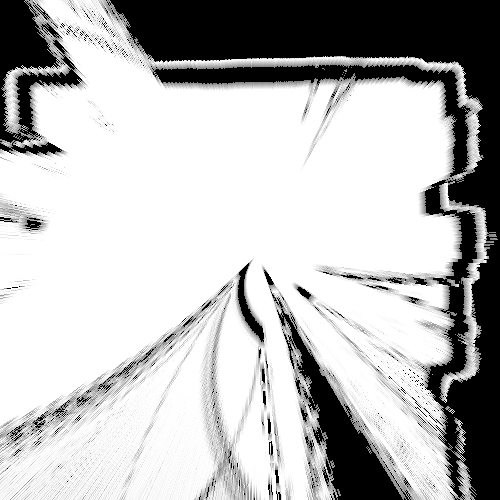